### Assignment6

### Brain vs. Body Weight
In the file brain_body.txt, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks
Find the linear regression equation for this data for brain weight to body weight.

Chart the original data and the equation on the chart.

Find the equation's  R2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
df = pd.read_fwf("brain_body.txt")

In [3]:
df

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5
...,...,...
57,160.000,169.0
58,0.900,2.6
59,1.620,11.4
60,0.104,2.5


In [4]:
df.shape

(62, 2)

In [5]:
print("Number of rows : ",df.shape[0])
print("Number of columns : ",df.shape[1])

Number of rows :  62
Number of columns :  2


In [6]:
df.isna().apply(pd.value_counts).T

,False
Brain,62
Body,62


In [7]:
df.dtypes

Brain    float64
Body     float64
dtype: object

In [8]:
df.isnull().sum()

Brain    0
Body     0
dtype: int64

#### Statistical Measures

In [9]:
df.describe()

,Brain,Body
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000


<AxesSubplot:xlabel='Brain', ylabel='Density'>

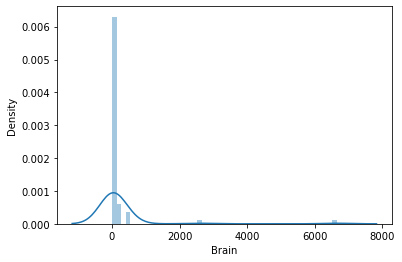

In [10]:
sns.distplot(df['Brain'])

<AxesSubplot:xlabel='Body', ylabel='Density'>

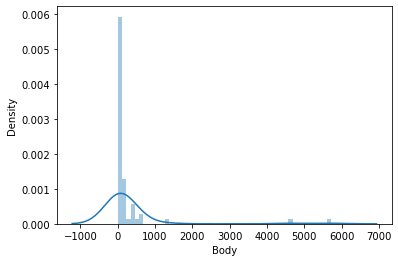

In [11]:
sns.distplot(df['Body'])

Finding outliers

In [12]:
#Finding IQR

q25=df['Brain'].quantile(0.25)
q75=df['Brain'].quantile(0.75)

In [13]:
q25,q75

(0.6000000000000001, 48.2025)

In [14]:
iqr=q75-q25
iqr

47.6025

In [15]:
max=q75+(1.5*iqr)
max

119.60625

In [16]:
min=q25-(1.5*iqr)
min

-70.80375000000001

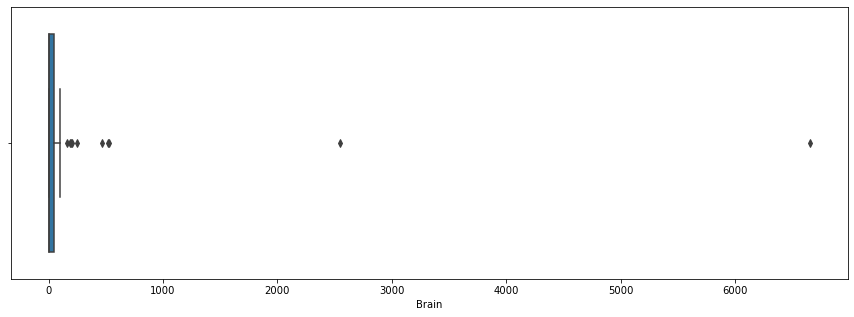

In [17]:
plt.figure(figsize=(15,5))
sns.boxplot(df['Brain'])
plt.show()

In [18]:
new_df=df[(df['Brain'] > min) & (df['Brain']< max)]
new_df.count()

Brain    52
Body     52
dtype: int64

<AxesSubplot:ylabel='Density'>

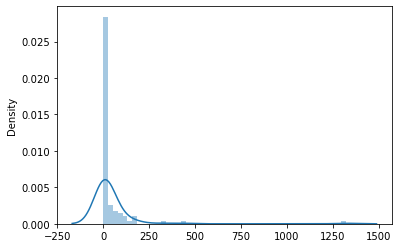

In [19]:
sns.distplot([new_df])

In [20]:
new_df.describe()

,Brain,Body
count,52.000000,52.000000
mean,11.786135,73.410000
std,23.094135,195.748303
min,0.005000,0.140000
25%,0.388750,3.375000
50%,1.660000,12.200000
75%,4.916000,56.500000
max,100.000000,1320.000000


<AxesSubplot:xlabel='Brain'>

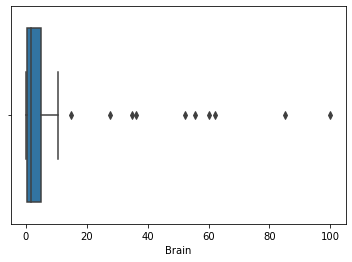

In [21]:
sns.boxplot(new_df['Brain'])

#### Capping

In [22]:
upper_limit=df['Brain'].mean()+3*df['Brain'].std()
lower_limit=df['Brain'].mean()-3*df['Brain'].std()

In [23]:
print(lower_limit,upper_limit)

-2498.68404768131 2896.2640154232454


In [24]:
#capping
new_df_cap = df.copy()
new_df_cap['Brain'] = np.where(
   new_df_cap['Brain'] > upper_limit,
   upper_limit,
   np.where(
       new_df_cap['Brain'] < lower_limit,
       lower_limit,
       new_df_cap['Brain']
   )
)

In [25]:
new_df_cap['Brain'].describe()

count      62.000000
mean      138.181339
std       490.841888
min         0.005000
25%         0.600000
50%         3.342500
75%        48.202500
max      2896.264015
Name: Brain, dtype: float64

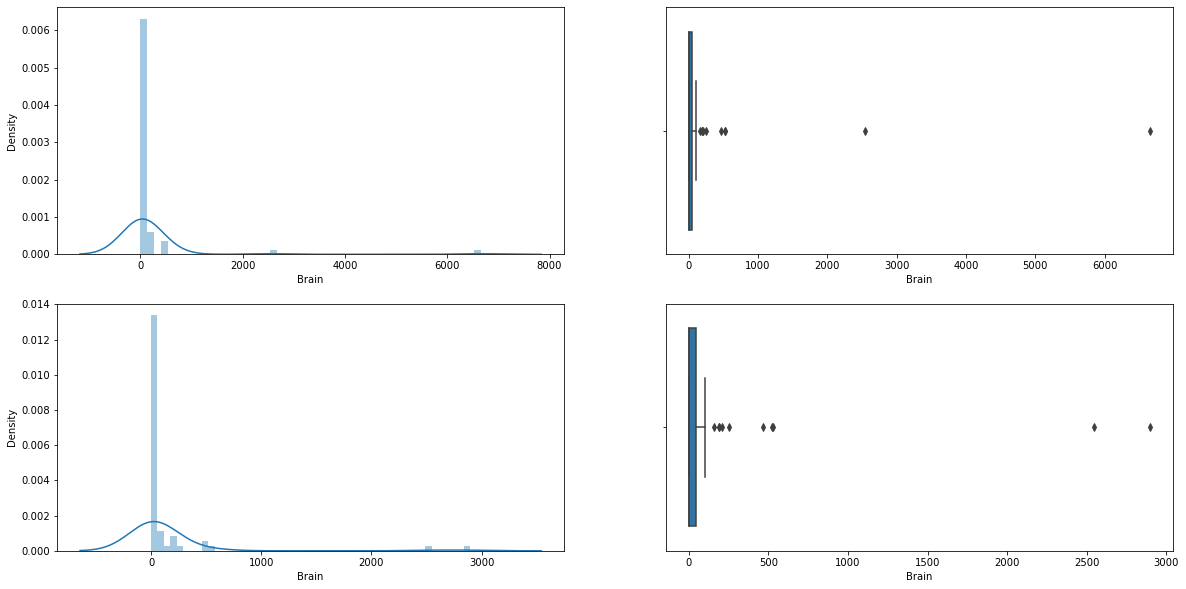

In [26]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.distplot(df['Brain'])
plt.subplot(2,2,2)
sns.boxplot(df['Brain'])
plt.subplot(2,2,3)
sns.distplot(new_df_cap['Brain'])
plt.subplot(2,2,4)
sns.boxplot(new_df_cap['Brain'])
plt.show()



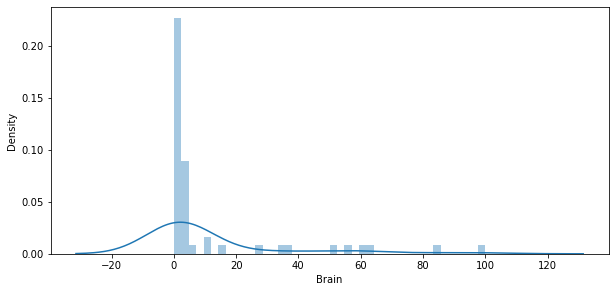

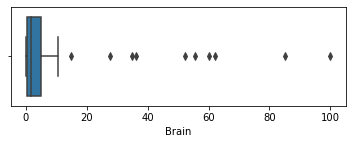

In [27]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
sns.distplot(new_df['Brain'])
plt.show()
plt.subplot(2,1,2)
sns.boxplot(new_df['Brain'])
plt.show()

In [28]:
corr=df.corr()

In [29]:
corr['Brain']

Brain    1.000000
Body     0.934164
Name: Brain, dtype: float64

In [30]:
new_df.corr()

,Brain,Body
Brain,1.000000,0.582123
Body,0.582123,1.000000


In [31]:
new_df_cap.corr()

,Brain,Body
Brain,1.000000,0.978862
Body,0.978862,1.000000


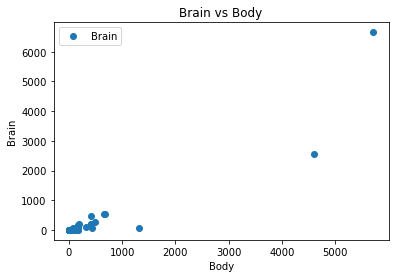

In [32]:
df.plot(x='Body', y='Brain', style='o')
plt.title('Brain vs Body')
plt.xlabel('Body')
plt.ylabel('Brain')
plt.show()

## Data with Outliers

### Data Preparation

In [33]:
X=df[['Body']]
y=df[['Brain']]

### Split Data

In [34]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [35]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(43, 1) (19, 1) (43, 1) (19, 1)


### Model Training

In [36]:
model=LinearRegression()

In [37]:
model.fit(X_train,y_train)

LinearRegression()

In [38]:
y_pred_outliers=model.predict(X_test)

Intercept c 

In [39]:
model.intercept_

array([-74.54110555])

Slope or m in y=mx+c

In [40]:
model.coef_

array([[0.90773099]])

### Evaluation Metrics

In [41]:
r2_score(y_test,y_pred_outliers)

0.8328993412816281

## Outliers removed  Data

### Data Preparation

In [42]:
X1=new_df_cap[['Body']]
y1=new_df_cap[['Brain']]

### Split Data

In [43]:
X_train,X_test,y_train,y_test=train_test_split(X1,y1,test_size=0.3,random_state=1)

### Model Training

In [44]:
lr=LinearRegression()

In [45]:
lr.fit(X_train,y_train)

LinearRegression()

In [46]:
y_pred=lr.predict(X_test)

Intercept c 

In [47]:
lr.intercept_

array([-26.70983509])

Slope m

In [48]:
lr.coef_

array([[0.51453044]])

### Evaluation

In [49]:
r2_score(y_test,y_pred)

0.708381051863342

2. Chart the original data and the equation on the chart

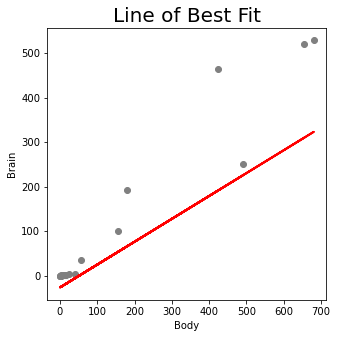

In [50]:
plt.figure(figsize=(5,5))
plt.scatter(X_test,y_test,color='gray')
plt.plot(X_test,y_pred,color='red',linewidth=2)
plt.xlabel('Body')
plt.ylabel('Brain')
plt.title('Line of Best Fit',fontsize=20)
plt.show()

Find the equation's R2 score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

0.708381051863342